In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from typing import Callable

In [116]:
from scipy.io import arff

In [117]:
data = arff.loadarff('dataset_191_wine.arff')
df = pd.DataFrame(data[0])
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,b'1',14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,b'1',13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,b'1',13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,b'1',14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,b'1',13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [118]:
df['class'].value_counts()

b'2'    71
b'1'    59
b'3'    48
Name: class, dtype: int64

In [119]:
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                             178 non-null object
Alcohol                           178 non-null float64
Malic_acid                        178 non-null float64
Ash                               178 non-null float64
Alcalinity_of_ash                 178 non-null float64
Magnesium                         178 non-null float64
Total_phenols                     178 non-null float64
Flavanoids                        178 non-null float64
Nonflavanoid_phenols              178 non-null float64
Proanthocyanins                   178 non-null float64
Color_intensity                   178 non-null float64
Hue                               178 non-null float64
OD280%2FOD315_of_diluted_wines    178 non-null float64
Proline                           178 non-null float64
dtypes: float64(13), object(1)
memory usage: 19.5+ KB


In [121]:
#find missings
df.isnull().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

In [122]:
#make vectors of classes (df_y) with one hot encoding
dummies = pd.get_dummies(df['class'])
y = dummies.values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [123]:
#make df of features
x = df.iloc[:, 1:]
x.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [124]:
#Normalizing data
x_scaled = MinMaxScaler().fit_transform(x)
x_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

### Distances

In [126]:
def euclidian_distance(x, xi):
    return np.sqrt(np.sum((x - xi) ** 2))


def manhattan_distance(x, xi):
    return np.sum(abs(x - xi))


def chebyshev_distance(x, xi):
    return np.max(abs(x - xi))

### Kernels

In [127]:
def uniform_kernel(x):
    if np.abs(x) < 1:
        return 0.5
    else:
        return 0.0


def triangular_kernel(x):
    if np.abs(x) < 1:
        return 1 - abs(x)
    else: 
        return 0.0


def epanechnikov_kernel(x):
    if np.abs(x) < 1:
        return 0.75 * (1 - x**2)
    else:
        return 0.0

def quartic_kernel(x):
    if np.abs(x) < 1:
        return 15/16 * (1 - x**2)**2
    else:
        return 0.0

### Model


In [128]:
class NonParametricRegression:
    def __init__(self,
                 distance_func: Callable,
                 kernel_func: Callable,
                 static_window_width: float = None,
                 neighbours_count: int = None):
        """Модель непараметрической регрессии

        Args:
            distance_func (Callable): функция вычисления дистанции
            kernel_func (Callable): функция вычисления ядра
            window_width (float, optional): ширина окна сглаживания. По умолчанию не задано.
            neighbours_count (int, optional): количество соседей. По умолчанию не задано.
        """

        # проверка того, что либо была задана ширина окна, либо количество соседей
        assert (static_window_width is None and neighbours_count is not None or
                static_window_width is not None and neighbours_count is None)

    
        self._distance_func = distance_func
        self._kernel_func = kernel_func
        self.static_window_width = static_window_width
        self.neighbours_count = neighbours_count

    @property
    def static_window_width(self) -> float:
        return self._window_width

    @static_window_width.setter
    def static_window_width(self, new_width: float) -> float:
        assert isinstance(new_width, float) or new_width is None
        self._window_width = new_width
        return new_width

    @property
    def neighbours_count(self) -> int:
        return self._neighbours_count

    @neighbours_count.setter
    def neighbours_count(self, new_count: int) -> int:
        assert isinstance(new_count, int) or new_count is None

        self._neighbours_count = new_count

        return new_count

    @property
    def distances(self):
        return [self._distance_func(self._current_selection, x_train_value) for x_train_value in self.x_train]

    @property
    def window_width(self) -> float:
        if self._window_width is not None:
            return self._window_width

        elif self._neighbours_count is not None:
            return sorted(self.distances)[self._neighbours_count - 1]

    @property
    def kernels(self) -> np.ndarray:
        return np.array([self._kernel_func(distance / self.window_width) for distance in self.distances])

    def fit(self, x: np.ndarray, y: np.ndarray):
        assert isinstance(x, np.ndarray)
        assert isinstance(y, np.ndarray)

        self.x_train = x
        self.y_train = y
    
        return self

    def predict(self, x: np.ndarray):
        if len(x.shape) > 1:
            y_predicted = [self._predict(x_value) for x_value in x]
        else:
            y_predicted = self._predict(x)

        return np.array(y_predicted)

    def _predict(self, x: np.ndarray):
        self._current_selection = x

        numenator = 0.0
        denominator = 0.0

        for y_train_value, kernel in zip(self.y_train, self.kernels):
            numenator += y_train_value * kernel
            denominator += kernel

        return numenator / denominator    

In [129]:
model = NonParametricRegression(manhattan_distance, triangular_kernel, neighbours_count=3)

In [130]:
model.fit(x_train, y_train)
result = model.predict(x_test)
print(f'model.predict(X_test): \n {result}')

model.predict(X_test): 
 [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.04263131 0.95736869]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.66861375 0.33138625 0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1

In [131]:
y_pred = np.argmax(result, axis = 1)
y_true = np.argmax(y_test, axis = 1)

print(f1_score(y_true, y_pred,average='micro'))

0.9166666666666666


### Leave-one-out


In [132]:
import itertools

In [133]:
distance_functions = [manhattan_distance, chebyshev_distance, euclidian_distance]

In [134]:
kernel_functions = [uniform_kernel, triangular_kernel, epanechnikov_kernel, quartic_kernel]

In [135]:
neighbours_counts = list(range(1, int(len(df)**(1/2))))

In [136]:
from dataclasses import dataclass

In [137]:
y_true = np.argmax(y_test, axis = 1)

In [138]:
def leave_one_out_validation(X, y, distance_func, kernel_func, static_window_width = None, neighbours_count = None):
    y_pred = []
    y_true = []
    for i, value in enumerate(X):
        X_train = np.delete(X, i, axis = 0)
        y_train = np.delete(y, i, axis = 0)
        X_test = X[i]
        y_test = y[i]
        
        model = NonParametricRegression(distance_func, kernel_func, static_window_width, neighbours_count)
        
        model.fit(X_train, y_train)
        
        y_pred.append(np.argmax(model.predict(X_test)))
        y_true.append(np.argmax(y_test))
        
    return f1_score(y_true, y_pred, average = 'macro')

In [139]:
leave_one_out_validation(x_train, y_train, euclidian_distance, epanechnikov_kernel, neighbours_count=4)

0.9519605564832405

In [140]:
def get_window_widths(X, distance_func):
    
    max_distance = np.max([distance_func(x1, x2) for x1 in X for x2 in X])
    
    return np.arange(max_distance / np.sqrt(len(X)), max_distance, max_distance / np.sqrt(len(X)))

In [141]:
get_window_widths(x_train, euclidian_distance)

array([0.16934803, 0.33869606, 0.5080441 , 0.67739213, 0.84674016,
       1.01608819, 1.18543623, 1.35478426, 1.52413229, 1.69348032,
       1.86282836])

In [142]:
from dataclasses import dataclass

In [143]:
@dataclass
class BestParams:
    f1: float = 0.0
    distance_func: Callable = None
    kernel_func: Callable = None
    neighbours_count: int = None
    window_width: int = None

In [144]:
def best_params(x, y):
    
    best_params_unfixed = BestParams(f1 = 0.0)
    
    for distance_func, kernel_func, neighbours_count in itertools.product(distance_functions, 
                                                                          kernel_functions,
                                                                          neighbours_counts):
        
        current_f1 = leave_one_out_validation(x, y, distance_func, kernel_func, neighbours_count = neighbours_count)
        
        if current_f1 > best_params_unfixed.f1:
            best_params_unfixed = BestParams(current_f1, distance_func, kernel_func, neighbours_count = neighbours_count)
            
        
    best_params_fixed = BestParams(f1 = 0.0)
    for distance_func in distance_functions:
        
        for kernel_func, window_width in itertools.product(kernel_functions, get_window_widths(x, distance_func)):
            
            current_f1 = leave_one_out_validation(x, y, distance_func, kernel_func, static_window_width = window_width)
            

            if current_f1 > best_params_fixed.f1:
                best_params_fixed = BestParams(current_f1, distance_func, kernel_func, window_width = window_width)

    return best_params_unfixed, best_params_fixed

In [145]:
def f1_scores(x, y, params: BestParams):
    
    result = {}
    
    if params.neighbours_count is not None:
        for neighbours_count in neighbours_counts:
            
            current_f1 = leave_one_out_validation(x, y, params.distance_func, params.kernel_func, neighbours_count = neighbours_count)
            
            result[neighbours_count] = current_f1
    
    if params.window_width is not None:
        for window_width in get_window_widths(x, params.distance_func):
             
            current_f1 = leave_one_out_validation(x, y, params.distance_func, params.kernel_func, static_window_width = window_width)
            result[window_width] = current_f1

    return dict(sorted(result.items()))

In [146]:
best_params_unfixed, best_params_fixed = best_params(x, y)

/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/pyt

In [147]:
results_1 = f1_scores(x_test, y_test, best_params_unfixed)
results_1

/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


{1: 0.18666666666666668,
 2: 0.9114687100893998,
 3: 0.9064039408866996,
 4: 1.0,
 5: 0.9761600681140911,
 6: 1.0,
 7: 0.9301587301587301,
 8: 0.9662835249042147,
 9: 0.9662835249042147,
 10: 0.9662835249042147,
 11: 0.9301587301587301,
 12: 0.890818858560794}

In [148]:
results_2 = f1_scores(x_test, y_test, best_params_fixed)
results_2

/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide
/home/kittitereh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


{0.8468380688928151: 0.18666666666666668,
 1.6936761377856302: 0.918169934640523,
 2.5405142066784454: 0.9761600681140911,
 3.3873522755712604: 0.6230581678857541,
 4.234190344464076: 0.18888888888888888}

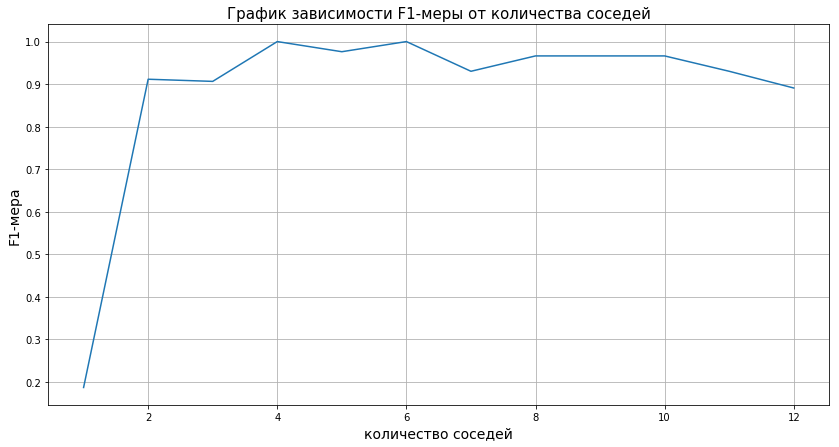

In [149]:
#график зависимости f1 и количества соседей
plt.figure(figsize = [14, 7])

# даем название осям и графику
plt.xlabel('количество соседей', fontsize = 14)
plt.ylabel('F1-мера', fontsize = 14)
plt.title('График зависимости F1-меры от количества соседей', fontsize = 15)

# рисуем точки
 
plt.plot(results_1.keys(), results_1.values(), label = 'F1-мера')
 
plt.grid()

# показываем график
plt.show()

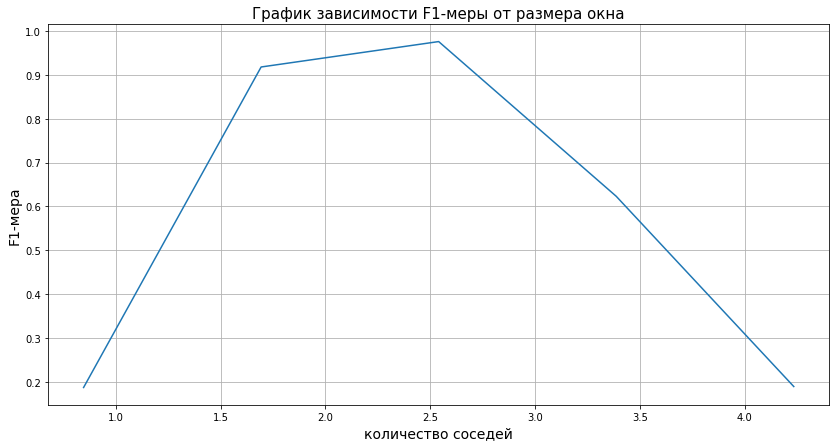

In [150]:
#график зависимости f1 и размера окна
plt.figure(figsize = [14, 7])

# даем название осям и графику
plt.xlabel('количество соседей', fontsize = 14)
plt.ylabel('F1-мера', fontsize = 14)
plt.title('График зависимости F1-меры от размера окна', fontsize = 15)

# рисуем точки
 
plt.plot(results_2.keys(), results_2.values(), label = 'F1-мера')
 
plt.grid()

# показываем график
plt.show()